In [0]:
!pip install covid

In [0]:
from covid import Covid

covid = Covid()
data=covid.get_data()


In [0]:
import csv

In [0]:
csvfile=open('covid.csv','w', newline='') 
fields=list(data[0].keys())
obj=csv.DictWriter(csvfile, fieldnames=fields)	      
obj.writeheader()	      
obj.writerows(data)	      
csvfile.close()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from mlxtend.plotting import plot_decision_regions as decision_regions

In [0]:
df=pd.read_csv("covid.csv")
olddf=pd.read_csv("COVIDTYPE.csv")


In [0]:
df['confirmed'].fillna(df['active']+df['deaths']+df['recovered'],inplace=True)
df['active'].fillna(df['confirmed']-(df['deaths']+df['recovered']),inplace=True)
df['deaths'].fillna(df['confirmed']-(df['active']+df['recovered']),inplace=True)
df['recovered'].fillna(df['confirmed']-(df['active']+df['deaths']),inplace=True)
deathpercent=(df['deaths']/df['confirmed'])*100
recoverpercent=(df['recovered']/df['confirmed'])*100
df['deathpercent']=deathpercent
df['recoverpercent']=recoverpercent

In [0]:
df = pd.merge(df,olddf[['id','TYPE']],on='id')


In [0]:
df.to_csv('covid.csv', index=False)

In [0]:
df = df.drop('last_update', axis=1)
df=df.drop('latitude', axis=1)
df=df.drop('longitude', axis=1)
df

,id,country,confirmed,active,deaths,recovered,deathpercent,recoverpercent,TYPE
0,18,US,1256972,1010344,75670,195036,6.020023,15.516336,A
1,162,Spain,221447,66866,26070,128511,11.772569,58.032396,B
2,11,Italy,215858,89624,29958,96276,13.878568,44.601544,C
3,17,United Kingdom,207977,176318,30689,970,14.755959,0.466398,B
4,14,Russia,187859,159528,1723,26608,0.917177,14.163814,B
...,...,...,...,...,...,...,...,...,...
179,53,Comoros,8,7,1,0,12.500000,0.000000,B
180,118,Mauritania,8,1,1,6,12.500000,75.000000,C
181,137,Papua New Guinea,8,0,0,8,0.000000,100.000000,A
182,36,Bhutan,7,2,0,5,0.000000,71.428571,B


In [0]:
df = df[pd.notnull(df['TYPE'])]
#df.isnull().sum()

In [0]:
df.TYPE=df.TYPE.apply(['A','B','C'].index)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
from sklearn.feature_selection import SelectFromModel

In [0]:
X = df.iloc[:,2:8].values  
Xnew = df.iloc[:,6:8].values    

In [0]:
from sklearn import tree

In [0]:
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=4)
clf=clf.fit(X,df['TYPE'])
clf.feature_importances_

array([0.11751296, 0.        , 0.15392652, 0.24047279, 0.29663523,
       0.1914525 ])

In [0]:
model=SelectFromModel(clf,prefit=True)
XnewTree=model.transform(X)
XnewTree.shape

(183, 3)

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,df['TYPE'],test_size=0.3,random_state=1)

In [0]:
model=tree.DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=4)
model=model.fit(xtrain,ytrain)
y=model.predict(xtest)

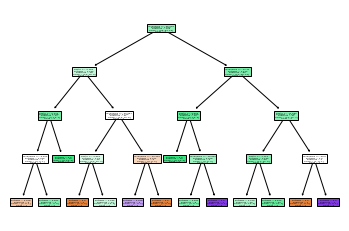

In [0]:
cl=['1','2','3']
#fn=['confirmed','active','death','recovered','deathPercent','recoverPercent']
fn=['death','recovered','percent']
tree.plot_tree(model,
               class_names=cl,
               feature_names = fn, 
               filled = True);


[]

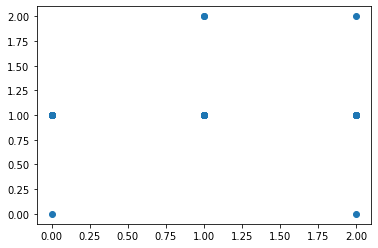

In [0]:
plt.scatter(ytest,y)
plt.plot()

In [0]:
model.score(Xnew,df['TYPE'])

0.7158469945355191

In [0]:
model.score(xtest,ytest)

0.6545454545454545

In [0]:
model.score(xtrain,ytrain)

0.7421875

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'recover')

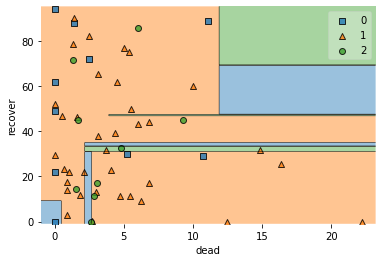

In [0]:
fig = decision_regions(xtest, ytest.values, clf=model, legend=1)
plt.xlabel('dead')
plt.ylabel('recover')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'recover')

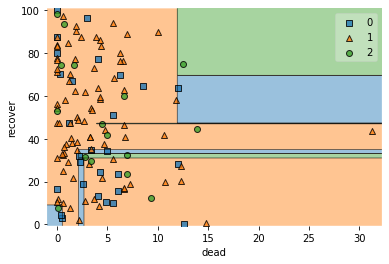

In [0]:
fig = decision_regions(xtrain, ytrain.values, clf=model, legend=1)
plt.xlabel('dead')
plt.ylabel('recover')

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y)
cm

array([[ 1,  9,  0],
       [ 0, 34,  2],
       [ 1,  7,  1]])

In [0]:
result=pd.DataFrame()
result['id']=ytest.index
result['real']=ytest.values
result['predict']=y

result=pd.merge(result,df[['id','country']],on='id')


In [0]:
result.to_csv('resultTree.csv', index=False)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10000,random_state=1)
rfc=rfc.fit(xtrain,ytrain)
predic_rfc=rfc.predict(xtest)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'recover')

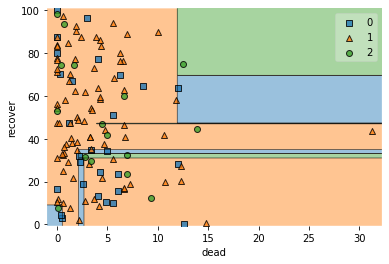

In [0]:
fig = decision_regions(xtrain, ytrain.values, clf=model, legend=1)
plt.xlabel('dead')
plt.ylabel('recover')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'recover')

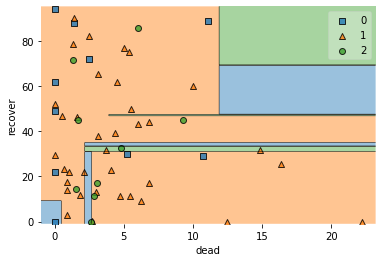

In [0]:
fig = decision_regions(xtest, ytest.values, clf=model, legend=1)
plt.xlabel('dead')
plt.ylabel('recover')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'recover')

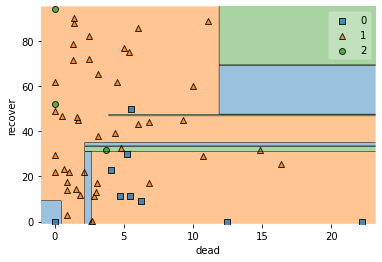

In [0]:
fig = decision_regions(xtest, predic_rfc, clf=model, legend=1)
plt.xlabel('dead')
plt.ylabel('recover')

In [0]:
rfc.score(xtrain,ytrain)

0.9921875

In [0]:
rfc.score(xtest,ytest)

0.5272727272727272

In [0]:
ytest.values

array([0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [0]:
predic_rfc

array([0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [0]:
cm=confusion_matrix(ytest,predic_rfc)
cm

array([[ 2,  7,  1],
       [ 7, 27,  2],
       [ 0,  9,  0]])

In [0]:
result=pd.DataFrame()
result['id']=ytest.index
result['real']=ytest.values
result['predict']=predic_rfc

result=pd.merge(result,df[['id','country']],on='id')

result.to_csv('resultRandomForest.csv', index=False)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knnmodel=knnmodel.fit(xtest,ytest)

In [0]:
knnpred=knnmodel.predict(xtest)

In [0]:
knnmodel.score(xtrain,ytrain)

0.59375

In [0]:
knnmodel.score(xtest,ytest)

0.6909090909090909

In [0]:
cm=confusion_matrix(ytest,knnpred)
cm

array([[ 5,  5,  0],
       [ 3, 33,  0],
       [ 1,  8,  0]])

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'recover')

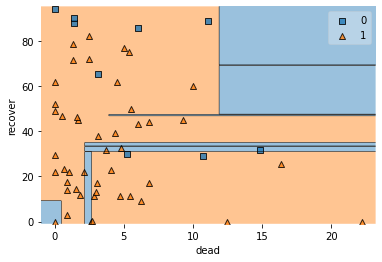

In [0]:
fig = decision_regions(xtest, knnpred, clf=model, legend=1)
plt.xlabel('dead')
plt.ylabel('recover')

In [0]:
result=pd.DataFrame()
result['id']=ytest.index
result['real']=ytest.values
result['predict']=knnpred

result=pd.merge(result,df[['id','country']],on='id')

result.to_csv('resultKNN.csv', index=False)

In [0]:
from google.colab import drive
drive.mount('/content/drive')